[INFO] Loaded 21 descriptor(s) from ./mapping_schemes
Selected mapping: csv_mapping_351
Score: 3
[[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -2.000000e-01
  -1.000000e-01 -2.000000e-01]
 [ 1.000000e-01  0.000000e+00 -1.000000e-01 ...  3.000000e-01
   3.000000e-01  3.000000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -8.800000e+00
  -8.800000e+00 -8.800000e+00]
 ...
 [ 1.689552e+06  1.689552e+06  1.689552e+06 ...  1.716848e+06
   1.720000e+06  1.720000e+06]
 [ 1.686400e+06  1.686400e+06  1.686400e+06 ...  1.715792e+06
   1.717904e+06  1.717904e+06]
 [ 4.231680e+05  4.231680e+05  4.231680e+05 ...  3.948160e+05
   3.948160e+05  3.948160e+05]]


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_19656\2668741787.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\MaxHaberbusch\anaconda3\envs\xlstm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


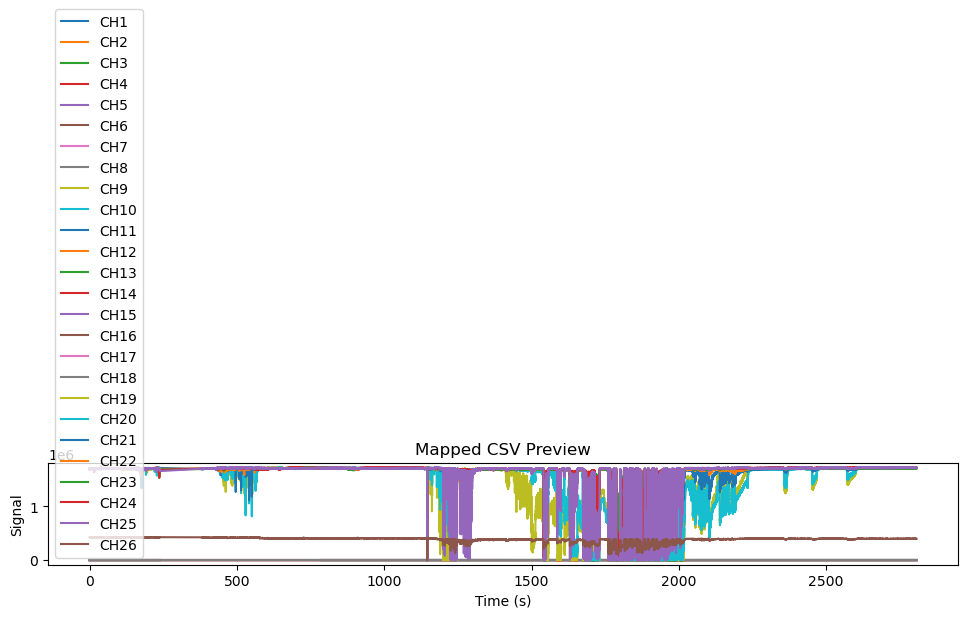

✅ Saved standardized data to: output\GI_Lab_Volunteer_Study_001_MadgTest_v42.npz


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "./downloads/GI_Lab_Volunteer_Study_001_MadgTest_v42.csv"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the other csv mapping schemes works well on this CSV file
result = match_best_mapping(descriptors, filepath, sparc_id=351)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])


# Preview signal
time = result['result']['time']
signals = result['result']['signals']

print(signals)

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("./output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_19656\538290490.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


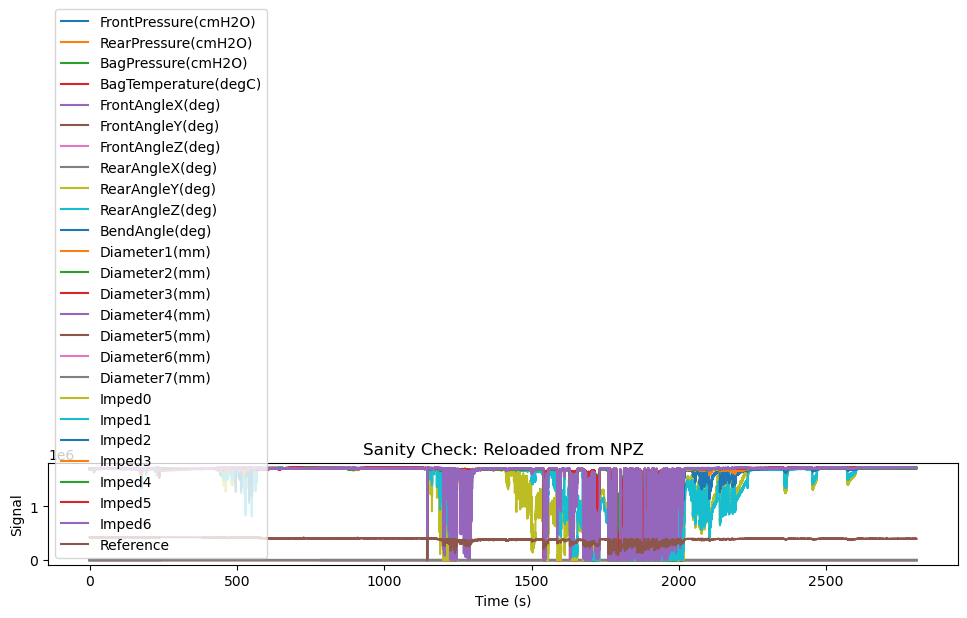

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.csv', 'database_id': 'unknown', 'sampling_frequency': np.float64(47.06581560627364), 'channel_names': ['FrontPressure(cmH2O)', 'RearPressure(cmH2O)', 'BagPressure(cmH2O)', 'BagTemperature(degC)', 'FrontAngleX(deg)', 'FrontAngleY(deg)', 'FrontAngleZ(deg)', 'RearAngleX(deg)', 'RearAngleY(deg)', 'RearAngleZ(deg)', 'BendAngle(deg)', 'Diameter1(mm)', 'Diameter2(mm)', 'Diameter3(mm)', 'Diameter4(mm)', 'Diameter5(mm)', 'Diameter6(mm)', 'Diameter7(mm)', 'Imped0', 'Imped1', 'Imped2', 'Imped3', 'Imped4', 'Imped5', 'Imped6', 'Reference'], 'channel_units': ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown'], 'version': 'v1.0', 'upload_date': '2025-07-30', 'conversion_date': '2025-07-30', 'auto

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("./output/GI_Lab_Volunteer_Study_001_MadgTest_v42.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])

print("shape of time:", time.shape)
print("shape of signals:", signals.shape)